# Youtube comment analysis using PrimeText

In [138]:
%matplotlib inline

In [43]:
import sys
import pandas as pa
import numpy as np
from PrimeText import PrimeText
import matplotlib.pyplot as plt

In [7]:
pt = PrimeText()
ytData = pa.read_csv("utube.csv",encoding ='ISO-8859-1')
comments = ytData['comment']

In [8]:
pt.cleanData(comments)
pt.assembleDictionary()
pt.indexDictionary()
pt.indexComments()

Records cleaned : 4007
Records checked : 3363
Indexed dictionary
Indexed comments


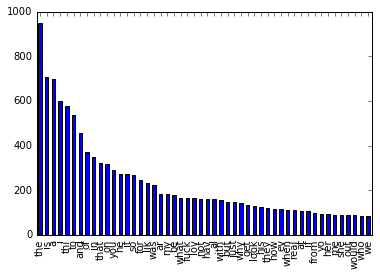

In [139]:
keyText = []
keyCount = []
for key, value in pt.indexedDictionary.items():
    c = pt.countInRecords([key])
    keyText.append(key)
    keyCount.append(c)
    
s1 = pa.Series(keyCount,index=keyText)

sortedS1  = s1.sort_values(ascending= False)[:50]

sortedS1.plot.bar()

In [134]:
df = pa.DataFrame(index=sortedS1.index, columns=sortedS1.index)
df = df.fillna(0)

In [135]:
names = sortedS1.index
colsdone = 0
for col in names:
    colsdone += 1
    sys.stdout.write("\rCols done : %i" % colsdone)
    for row in names:
        df[col][row] = pt.countInRecords([col,row])
sys.stdout.write("\n")
sys.stdout.flush()

Cols done : 50


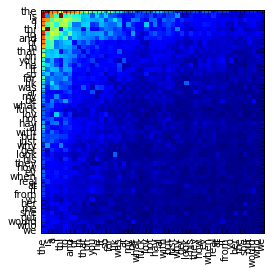

In [140]:
imgplot = plt.imshow(df,interpolation="nearest")
plt.xticks( range(len(names)), names, rotation=90 )
plt.yticks( range(len(names)), names, rotation=0 )
plt.show()